In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Data preprocessing et visualisation**

In [2]:
data = pd.read_csv('Fraud_Data.csv')
ip = pd.read_csv('IpAddress_to_Country.csv')

In [3]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [5]:
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


Premièrement, on récupère les pays correspondants aux adresses ip des différents achats présents dans le dataframe ***data***

In [6]:
def ip_to_country(ip_):
    try:
        return ip.country[(ip.lower_bound_ip_address <= ip_) & (ip.upper_bound_ip_address >= ip_)].iloc[0]
    except IndexError:
        return 'Pays Inconnu'


In [7]:
%time data['country'] = data.ip_address.apply(ip_to_country)

CPU times: user 2min 14s, sys: 1.21 s, total: 2min 15s
Wall time: 2min 18s


On transforme les colonnes *signup_time* et *purchase_time* au format *datetime*

In [8]:
data.signup_time = pd.to_datetime(data.signup_time)
data.purchase_time = pd.to_datetime(data.purchase_time)

Puis, on décompose les données des colonnes *signup_time* et *purchase_time* en mois, jour, heure et minute

In [9]:
import datetime

data['signup_month'] = data.signup_time.apply(lambda x: x.month)
data['signup_day'] = data.signup_time.apply(lambda x: x.day)
data['signup_hour'] = data.signup_time.apply(lambda x: x.hour)
data['signup_minute'] = data.signup_time.apply(lambda x: x.minute)

data['purchase_month'] = data.purchase_time.apply(lambda x: x.month)
data['purchase_day'] = data.purchase_time.apply(lambda x: x.day)
data['purchase_hour'] = data.purchase_time.apply(lambda x: x.hour)
data['purchase_minute'] = data.purchase_time.apply(lambda x: x.minute)

On récupère également le jour de la semaine correspondant

In [10]:
from datetime import date
data['purchase_weekday'] = data.purchase_time.apply(lambda x: date.isoweekday(x))

On calcule le temps écoulé entre l'achat et l'inscription de l'utilisateur sur le site

In [11]:
data['elapsed'] = (data.purchase_time - data.signup_time).apply(lambda x: x.total_seconds())

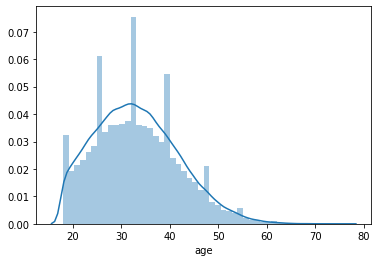

In [12]:
sns.distplot(data.age)

On catégorise les valeurs de la colonnes *age* en différentes tranches

In [13]:
data.age = data.age.apply(lambda x: 18 if x < 20
                                    else 20 if 20 <= x < 25
                                    else 25 if 25 <= x < 30
                                    else 30 if 30 <= x < 35
                                    else 35 if 35 <= x < 40
                                    else 40 if 40 <= x < 45
                                    else 45 if 45 <= x < 50
                                    else 50 if 50 <= x < 55
                                    else 55 if 55 <= x < 60
                                    else 60 if 60 <= x < 65
                                    else 65)

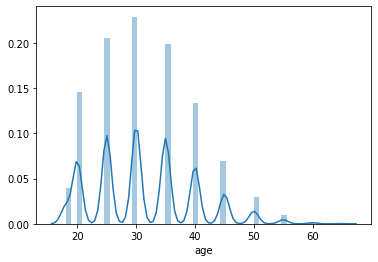

In [14]:
sns.distplot(data.age)

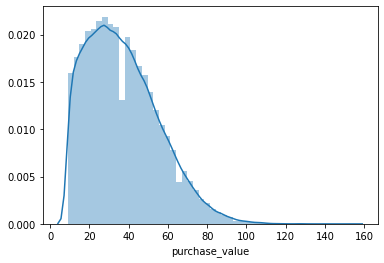

In [15]:
sns.distplot(data.purchase_value)

In [16]:
data.purchase_value.value_counts()

28     3328
27     3196
32     3174
24     3152
26     3145
       ... 
120       1
121       1
122       1
123       1
132       1
Name: purchase_value, Length: 122, dtype: int64

On catégorise également les valeurs de la variable *purchase_value* en fonction du montant de l'achat réalisé

In [17]:
data.purchase_value = data.purchase_value.apply(lambda x: 1 if x < 40
                                                else 2 if 40 <= x < 80
                                                else 3 if 80 <= x < 120
                                                else 4)

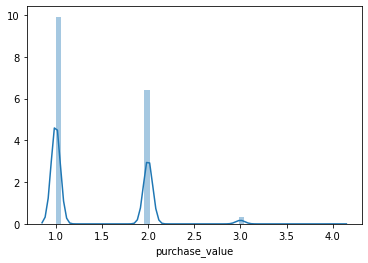

In [18]:
sns.distplot(data.purchase_value)

In [19]:
data.purchase_value.value_counts()

1    89919
2    57988
3     3188
4       17
Name: purchase_value, dtype: int64

On calcule ensuite le nombre d'achat réalisé :
- à partir d'un même appareil
- à partir d'une même adresse ip

In [20]:
nb_device = data.loc[:, ['device_id']]
nb_device['count'] = 1
nb_device = nb_device.groupby('device_id').sum().reset_index().sort_values('count', ascending=False)

In [21]:
nb_device['count'].value_counts()

1     131781
2       5327
11       101
10        92
12        90
3         90
9         78
8         69
13        64
14        57
7         50
15        41
16        36
6         29
17        13
5         13
18        10
20         6
19         5
4          4
Name: count, dtype: int64

In [22]:
nb_ip = data.loc[:, ['ip_address']]
nb_ip['count'] = 1
nb_ip = nb_ip.groupby('ip_address').sum().reset_index().sort_values('count', ascending=False)

In [23]:
nb_ip

,ip_address,count
50543,1.502818e+09,20
19944,5.760609e+08,20
128962,3.874758e+09,20
68161,2.050964e+09,20
97533,2.937899e+09,19
...,...,...
47950,1.427304e+09,1
47949,1.427303e+09,1
47948,1.427285e+09,1
47947,1.427208e+09,1


In [24]:
nb_ip['count'].value_counts()

1     142752
11       100
12        91
10        89
9         82
8         71
13        64
14        59
7         50
16        36
15        36
6         30
5         13
17        12
18         9
19         7
4          4
20         4
3          2
2          1
Name: count, dtype: int64

In [25]:
def nb_purchase_device(device):
    return nb_device[nb_device.device_id==device].iloc[0,1]

In [26]:
def nb_purchase_ip(ip):
    return nb_ip[nb_ip.ip_address==ip].iloc[0,1]

In [27]:
%time data['nb_purchase_device'] = data.device_id.apply(nb_purchase_device)

CPU times: user 35min 41s, sys: 6.78 s, total: 35min 48s
Wall time: 36min 4s


In [28]:
%time data['nb_purchase_ip'] = data.ip_address.apply(nb_purchase_ip)

CPU times: user 1min 36s, sys: 513 ms, total: 1min 37s
Wall time: 1min 38s


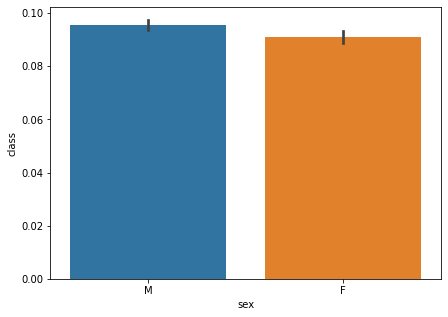

In [29]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data.sex, data['class'])

In [30]:
a = len(data)-(len(data) - len(data[(data.sex=='M')&(data['class']==1)]))
b = len(data)-(len(data) - len(data[(data.sex=='M')&(data['class']==0)]))
rate_M = round(a / b, 2)*100
print('Le taux de fraude provenant d\'utilisateurs masculin est de : {}%'.format(rate_M))

Le taux de fraude provenant d'utilisateurs masculin est de : 11.0%


In [31]:
c = len(data)-(len(data) - len(data[(data.sex=='F')&(data['class']==1)]))
d = len(data)-(len(data) - len(data[(data.sex=='F')&(data['class']==0)]))
rate_F = round(c / d, 2)*100
print('Le taux de fraude provenant d\'utilisateurs feminin est de : {}%'.format(rate_F))

Le taux de fraude provenant d'utilisateurs feminin est de : 10.0%


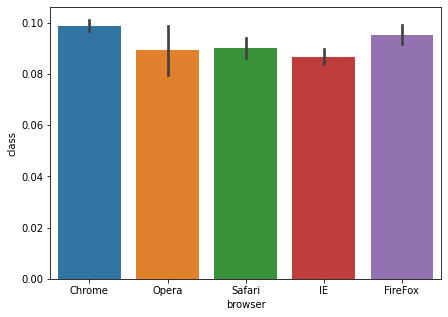

In [32]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data.browser, data['class'])

In [33]:
data.browser.value_counts()

Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: browser, dtype: int64

In [34]:
e = len(data)-(len(data) - len(data[(data.browser=='Chrome')&(data['class']==1)]))
f = len(data)-(len(data) - len(data[(data.browser=='Chrome')&(data['class']==0)]))
rate_chrome = round(e / f, 2)*100
print('Le taux de fraude provenant de Google Chrome est de : {}%'.format(rate_chrome))

Le taux de fraude provenant de Google Chrome est de : 11.0%


In [35]:
g = len(data)-(len(data) - len(data[(data.browser=='IE')&(data['class']==1)]))
h = len(data)-(len(data) - len(data[(data.browser=='IE')&(data['class']==0)]))
rate_ie = round(g / h, 2)*100
print('Le taux de fraude provenant d\'Internet Explorer est de : {}%'.format(rate_ie))

Le taux de fraude provenant d'Internet Explorer est de : 10.0%


In [36]:
i = len(data)-(len(data) - len(data[(data.browser=='FireFox')&(data['class']==1)]))
j = len(data)-(len(data) - len(data[(data.browser=='FireFox')&(data['class']==0)]))
rate_firefox = round(i / j, 2)*100
print('Le taux de fraude provenant de Mozilla Firefox est de : {}%'.format(rate_firefox))

Le taux de fraude provenant de Mozilla Firefox est de : 11.0%


In [37]:
k = len(data)-(len(data) - len(data[(data.browser=='Opera')&(data['class']==1)]))
l = len(data)-(len(data) - len(data[(data.browser=='Opera')&(data['class']==0)]))
rate_opera = round(k / l, 2)*100
print('Le taux de fraude provenant de Mozilla Firefox est de : {}%'.format(rate_opera))

Le taux de fraude provenant de Mozilla Firefox est de : 10.0%


In [38]:
m = len(data)-(len(data) - len(data[(data.browser=='Safari')&(data['class']==1)]))
n = len(data)-(len(data) - len(data[(data.browser=='Safari')&(data['class']==0)]))
rate_safari = round(m / n, 2)*100
print('Le taux de fraude provenant de Mozilla Firefox est de : {}%'.format(rate_safari))

Le taux de fraude provenant de Mozilla Firefox est de : 10.0%


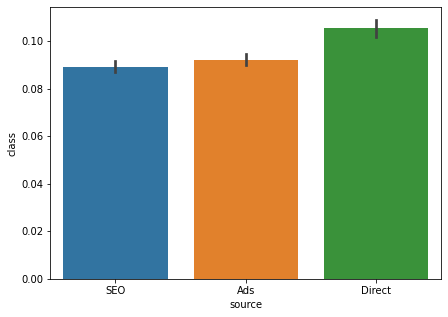

In [39]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data.source, data['class'])

In [40]:
o = len(data)-(len(data) - len(data[(data.source=='Direct')&(data['class']==1)]))
p = len(data)-(len(data) - len(data[(data.source=='Direct')&(data['class']==0)]))
rate_direct = round(o / p, 2)*100
print('Le taux de fraude provenant d\'un traffic direct est de : {}%'.format(rate_direct))

Le taux de fraude provenant d'un traffic direct est de : 12.0%


In [41]:
q = len(data)-(len(data) - len(data[(data.source=='SEO')&(data['class']==1)]))
r = len(data)-(len(data) - len(data[(data.source=='SEO')&(data['class']==0)]))
rate_seo = round(q / r, 2)*100
print('Le taux de fraude provenant du référencement naturel est de : {}%'.format(rate_seo))

Le taux de fraude provenant du référencement naturel est de : 10.0%


In [42]:
s = len(data)-(len(data) - len(data[(data.source=='Ads')&(data['class']==1)]))
t = len(data)-(len(data) - len(data[(data.source=='Ads')&(data['class']==0)]))
rate_ads = round(s / t, 2)*100
print('Le taux de fraude provenant des liens sponsorisés est de : {}%'.format(rate_ads))

Le taux de fraude provenant des liens sponsorisés est de : 10.0%


On calcule également un taux de fraude pour chaque pays.

On commence par calculer le nombre total d'utilisateurs dans chaque pays

In [43]:
nb_user_country = pd.DataFrame(data.country.value_counts()).reset_index().rename(columns={'index' : 'country', 'country' : 'nb_users'})
nb_user_country

,country,nb_users
0,United States,58049
1,Pays Inconnu,21966
2,China,12038
3,Japan,7306
4,United Kingdom,4490
...,...,...
177,Vanuatu,1
178,San Marino,1
179,Bonaire; Sint Eustatius; Saba,1
180,British Indian Ocean Territory,1


On calcule le nombre de fraude dans chaque pays

In [44]:
data_fraud = data[data['class'] == 1]

nb_fraud_country = pd.DataFrame(data_fraud.country.value_counts()).reset_index().rename(columns={'index' : 'country', 'country' : 'nb_users'})
nb_fraud_country

,country,nb_users
0,United States,5551
1,Pays Inconnu,1883
2,China,1043
3,Japan,715
4,United Kingdom,477
...,...,...
105,Montenegro,1
106,Mauritius,1
107,Bosnia and Herzegowina,1
108,Serbia,1


Puis, on assemble les deux dataframes et on calcule, à partir des données, le taux de fraude pour chaque pays.

In [45]:
fraud_country = nb_user_country.merge(nb_fraud_country, how='left', on='country').fillna(0).rename(columns={'nb_users_x':'total_user', 'nb_users_y':'fraud_user'})
fraud_country['country_coef_fraud'] = round(fraud_country.fraud_user / fraud_country.total_user,2)*100

In [46]:
fraud_country = fraud_country.sort_values(by='country_coef_fraud', ascending=False).reset_index().drop(columns=['index', 'fraud_user', 'total_user'])

Enfin, on assemble ce dataframe au dataframe original ***data***

In [47]:
data = data.merge(fraud_country, how='left', on='country')

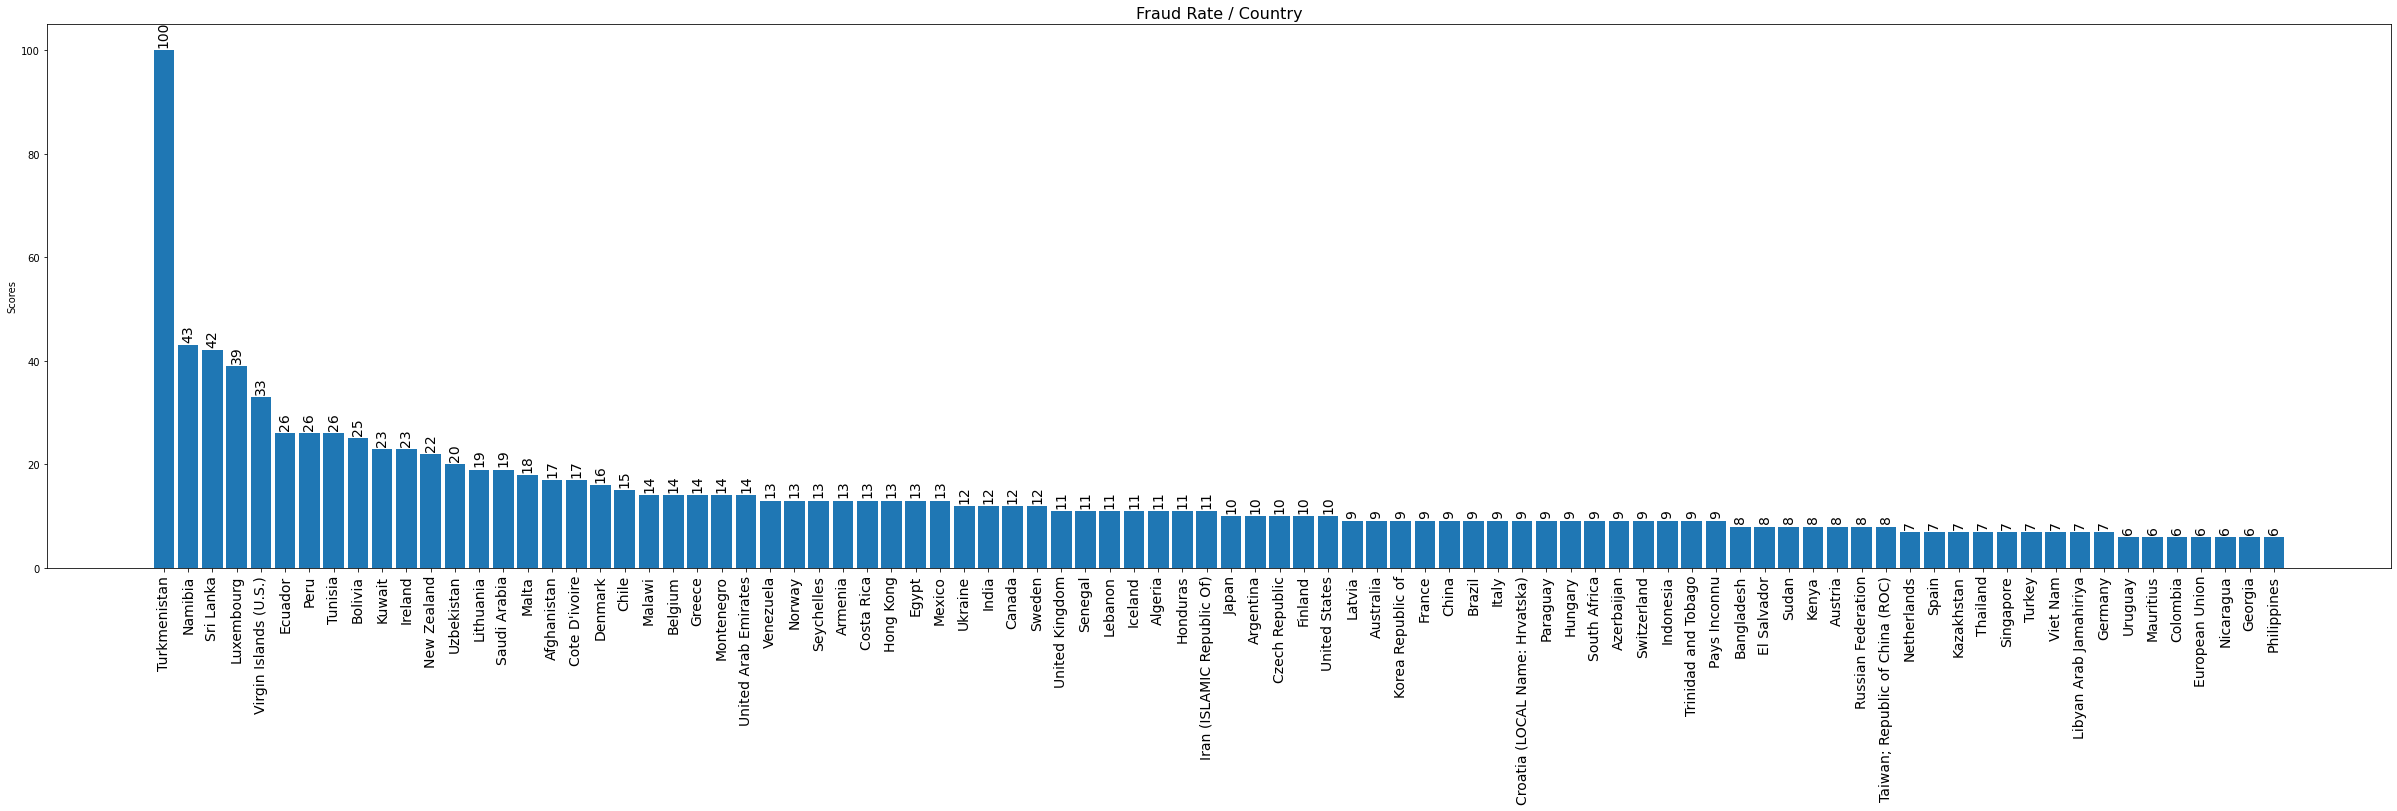

In [48]:
target_country = fraud_country[fraud_country.country_coef_fraud>5]

fig, ax = plt.subplots(figsize=(42,10))
labels=list(target_country.country)

x = np.arange(len(labels))
width = 0.85

rect = ax.bar(target_country.country, target_country.country_coef_fraud.astype('int64'), width)

ax.set_ylabel('Scores')
ax.set_title('Fraud Rate / Country', fontsize=16)
ax.set_xticks(x)
plt.xticks(fontsize=14, rotation=90)

def autolabel(rect):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for r in rect:
        height = r.get_height()
        ax.annotate('{}'.format(height),
                    xy=(r.get_x() + r.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90, fontsize=14)

autolabel(rect)

plt.show()

On transforme les variables *source*, *sex*, *browser* et *country* en variables muettes pour qu'elles puissent être interpretées par nos modèles de prédiction

In [49]:
data = pd.get_dummies(data, columns=['source', 'sex', 'browser', 'country'], drop_first=True)

On supprime les variables *user_id*, *signup_time*, *purchase_time*, *device_id* et *ip_address* qui ne sont plus d'aucune utilité. 

In [50]:
data = data.drop(columns=['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address'])

In [51]:
data

,purchase_value,age,class,signup_month,signup_day,signup_hour,signup_minute,purchase_month,purchase_day,purchase_hour,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,1,35,0,2,24,22,55,4,18,2,...,0,0,0,0,0,0,0,0,0,0
1,1,50,0,6,7,20,39,6,8,1,...,1,0,0,0,0,0,0,0,0,0
2,1,50,1,1,1,18,52,1,1,18,...,1,0,0,0,0,0,0,0,0,0
3,2,40,0,4,28,21,13,5,4,13,...,0,0,0,0,0,0,0,0,0,0
4,1,45,0,7,21,7,9,9,9,18,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,2,25,1,1,27,3,3,3,29,0,...,1,0,0,0,0,0,0,0,0,0
151108,1,30,0,5,15,17,43,5,26,12,...,0,0,0,0,0,0,0,0,0,0
151109,2,25,0,3,3,23,7,5,20,7,...,0,0,0,0,0,0,0,0,0,0
151110,2,35,0,7,9,20,6,9,7,9,...,1,0,0,0,0,0,0,0,0,0


On sauvegarde le dataframe préparé au format *.csv*

In [52]:
data.to_csv('fraudulent_activities_preprocessed.csv')

# **Modèles de prédiction des cas de fraude**

On charge les données sauvegardées sur le fichier *fraudulent_activities_preprocessed.csv*

In [53]:
data = pd.read_csv('fraudulent_activities_preprocessed.csv').drop(columns=['Unnamed: 0'])

In [54]:
data

,purchase_value,age,class,signup_month,signup_day,signup_hour,signup_minute,purchase_month,purchase_day,purchase_hour,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,1,35,0,2,24,22,55,4,18,2,...,0,0,0,0,0,0,0,0,0,0
1,1,50,0,6,7,20,39,6,8,1,...,1,0,0,0,0,0,0,0,0,0
2,1,50,1,1,1,18,52,1,1,18,...,1,0,0,0,0,0,0,0,0,0
3,2,40,0,4,28,21,13,5,4,13,...,0,0,0,0,0,0,0,0,0,0
4,1,45,0,7,21,7,9,9,9,18,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,2,25,1,1,27,3,3,3,29,0,...,1,0,0,0,0,0,0,0,0,0
151108,1,30,0,5,15,17,43,5,26,12,...,0,0,0,0,0,0,0,0,0,0
151109,2,25,0,3,3,23,7,5,20,7,...,0,0,0,0,0,0,0,0,0,0
151110,2,35,0,7,9,20,6,9,7,9,...,1,0,0,0,0,0,0,0,0,0


La variable cible *class* est très déséquilibrée. Le dataset contient :

In [55]:
print(round(len(data['class'][data['class']==0])/len(data)*100, 2), '% de cas non frauduleux')
print(round(len(data['class'][data['class']==1])/len(data)*100, 2), '% de cas frauduleux')

90.64 % de cas non frauduleux
9.36 % de cas frauduleux


On sépare les variables explicatives (X) des variables cibles (y)

In [56]:
X = data.drop(columns='class')
y = data.loc[:, 'class']

In [57]:
col = X.columns

On normalise les données de X grâce au StandardScaler de la librairie SKLearn

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(data = scaler.fit_transform(X), columns=col)

In [59]:
X

,purchase_value,age,signup_month,signup_day,signup_hour,signup_minute,purchase_month,purchase_day,purchase_hour,purchase_minute,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,-0.795096,0.439226,-0.951542,1.061630,1.519557,1.476270,-0.754946,0.308768,-1.377455,1.012746,...,-0.789785,-0.023015,-0.008135,-0.002572,-0.040789,-0.06044,-0.004456,-0.002572,-0.008135,-0.006301
1,-0.795096,2.189379,0.820753,-0.885487,1.230382,0.552214,-0.003243,-0.825780,-1.522122,0.493633,...,1.266167,-0.023015,-0.008135,-0.002572,-0.040789,-0.06044,-0.004456,-0.002572,-0.008135,-0.006301
2,-0.795096,2.189379,-1.394615,-1.572705,0.941206,1.303009,-1.882499,-1.619963,0.937208,1.301142,...,1.266167,-0.023015,-0.008135,-0.002572,-0.040789,-0.06044,-0.004456,-0.002572,-0.008135,-0.006301
3,1.070130,1.022611,-0.065394,1.519775,1.374969,-0.949376,-0.379095,-1.279599,0.213876,1.416500,...,-0.789785,-0.023015,-0.008135,-0.002572,-0.040789,-0.06044,-0.004456,-0.002572,-0.008135,-0.006301
4,-0.795096,1.605995,1.263827,0.718021,-0.649257,-1.180390,1.124310,-0.712325,0.937208,0.608991,...,1.266167,-0.023015,-0.008135,-0.002572,-0.040789,-0.06044,-0.004456,-0.002572,-0.008135,-0.006301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,1.070130,-0.727543,-1.394615,1.405239,-1.227607,-1.526911,-1.130797,1.556770,-1.666788,0.032199,...,1.266167,-0.023015,-0.008135,-0.002572,-0.040789,-0.06044,-0.004456,-0.002572,-0.008135,-0.006301
151108,-0.795096,-0.144158,0.377679,0.030803,0.796619,0.783228,-0.379095,1.216406,0.069209,-0.313877,...,-0.789785,-0.023015,-0.008135,-0.002572,-0.040789,-0.06044,-0.004456,-0.002572,-0.008135,-0.006301
151109,1.070130,-0.727543,-0.508468,-1.343632,1.664144,-1.295897,-0.379095,0.535677,-0.654123,-1.294424,...,-0.789785,-0.023015,-0.008135,-0.002572,-0.040789,-0.06044,-0.004456,-0.002572,-0.008135,-0.006301
151110,1.070130,0.439226,1.263827,-0.656414,1.230382,-1.353650,1.124310,-0.939235,-0.364790,0.262916,...,1.266167,-0.023015,-0.008135,-0.002572,-0.040789,-0.06044,-0.004456,-0.002572,-0.008135,-0.006301


On sépare les données en un jeu d'entraînement et un jeu de test

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=42)

Nos variables explicatives étant toutes indépendantes, on commence par tester le modèle de classification binaire Bernouilli Naive Bayes.


In [61]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_test, y_test, cv=10).mean()

0.9444568045867822

In [63]:
y_pred_bnb = clf.predict(X_test)

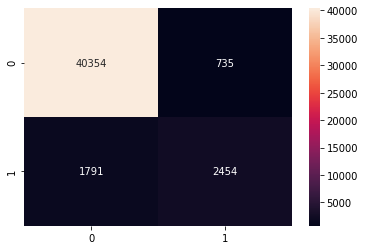

In [64]:
from sklearn.metrics import confusion_matrix
conf_mtrx_bnb = confusion_matrix(y_test, y_pred_bnb)

sns.heatmap(conf_mtrx_bnb, annot=True, fmt='d')

On utilise la GridSearchCV de la librairie SKLearn pour trouver le paramètre *alpha* optimal

In [65]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : np.arange(0, 1, 0.1), 'fit_prior': [True, False]}

grid = GridSearchCV(cv=5, estimator=clf, param_grid=params)
%time grid = grid.fit(X_train, y_train)

/usr/local/venv/tf2_venv/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/venv/tf2_venv/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/venv/tf2_venv/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/venv/tf2_venv/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/venv/tf2_venv/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = 

CPU times: user 43.3 s, sys: 12.3 s, total: 55.7 s
Wall time: 37.7 s


In [66]:
grid.best_params_

{'alpha': 0.4, 'fit_prior': True}

In [67]:
opt_clf = BernoulliNB(alpha=0.4)
opt_clf.fit(X_train, y_train)

BernoulliNB(alpha=0.4, binarize=0.0, class_prior=None, fit_prior=True)

In [68]:
cross_val_score(opt_clf, X_test, y_test, cv=10).mean()

0.9444788504357255

On essaye avec un modèle arbre de décision

In [69]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=10)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
cross_val_score(tree_clf, X_test, y_test, cv=10).mean()

0.9543170258276534

On utilise la GridSearchCV de la librairie SKLearn pour trouver les hyperparamètres optimaux

In [71]:
params_tree = {'criterion':['entropy', 'gini'], 'max_depth': np.arange(5, 20), 'min_samples_leaf': [1, 5, 10, 20]}

grid_tree = GridSearchCV(cv=5, estimator=tree_clf, param_grid=params_tree)

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                     

In [72]:
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}

In [73]:
opt_tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

opt_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
cross_val_score(opt_tree_clf, X_test, y_test, cv=10).mean()

0.9564345999259849

In [75]:
y_pred_tree = opt_tree_clf.predict(X_test)

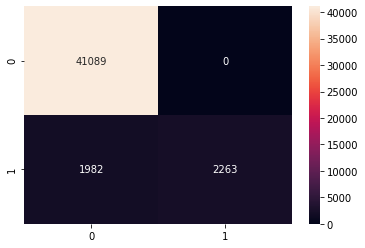

In [76]:
conf_mtrx_tree = confusion_matrix(y_test, y_pred_tree)

sns.heatmap(conf_mtrx_tree, annot=True, fmt='d')

On entraîne une méthode de boosting XGBoost sur le modèle arbre de décision  

In [77]:
xg_tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)

#Entraînement d'un premier arbre de décision
xg_tree_clf.fit(X_train, y_train)

#Entraînement d'un deuxième arbre avec les erreurs résiduelles faites par le premier arbre
y2 = y_train - xg_tree_clf.predict(X_train)
xg_tree_clf.fit(X_train, y2)

#Entraînement d'un troisième arbre avec les erreurs résiduelles faites par le deuxième arbre
y3 = y2 - xg_tree_clf.predict(X_train)
xg_tree_clf.fit(X_train, y3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
cross_val_score(xg_tree_clf, X_test, y_test, cv=10).mean()

0.9564345999259849

On entraîne une méthode de boosting AdaBoost

In [79]:
from sklearn.ensemble import AdaBoostClassifier

adB_clf = AdaBoostClassifier(random_state=42, learning_rate=1)

adB_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=42)

In [80]:
cross_val_score(adB_clf, X_test, y_test, cv=10).mean()

0.9560596015437834

On utilise la GridSearchCV de la librairie SKLearn pour trouver le learning rate optimal

In [81]:
params_adB = {'learning_rate': np.arange(0.1,1,0.1)}
grid_adB = GridSearchCV(cv=5, estimator=adB_clf, param_grid=params_adB)

grid_adB.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None, learning_rate=1,
                                          n_estimators=50, random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
grid_adB.best_params_

{'learning_rate': 0.1}

In [83]:
opt_adB_clf = AdaBoostClassifier(learning_rate=0.1, random_state=42)
opt_adB_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=50, random_state=42)

In [84]:
cross_val_score(opt_adB_clf, X_test, y_test, cv=10).mean()

0.9562581212265762

In [85]:
y_pred_adB = opt_adB_clf.predict(X_test)

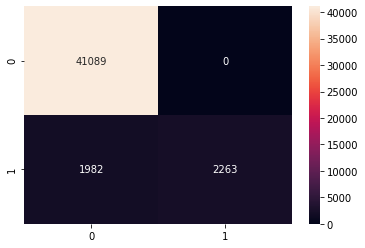

In [86]:
conf_mtrx_adB = confusion_matrix(y_test, y_pred_adB)

sns.heatmap(conf_mtrx_adB, annot=True, fmt='d')

On entraîne un modèle de forêt aléatoire

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion='entropy')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
cross_val_score(rf_clf, X_test, y_test, cv=10).mean()

0.9562140003353342

In [89]:
params_rf = {'n_estimators' : np.arange(10, 100, 10)}
grid_rf = GridSearchCV(cv=5, estimator=rf_clf, param_grid=params_rf)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
  

In [90]:
grid_rf.best_params_

{'n_estimators': 30}

In [91]:
opt_rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=30)
opt_rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
cross_val_score(opt_rf_clf, X_test, y_test, cv=10).mean()

0.9562140003353342

In [93]:
y_pred_rf = opt_rf_clf.predict(X_test)

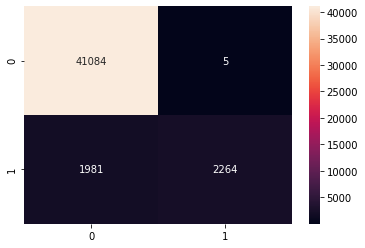

In [94]:
conf_mtrx_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(conf_mtrx_rf, annot=True, fmt='d')

On construit un modèle réseau de neurones avec la librairie Tensorflow

In [95]:
import tensorflow as tf

In [96]:
data = pd.read_csv('fraudulent_activities_preprocessed.csv').drop(columns=['Unnamed: 0'])

In [97]:
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace(';', '')
data.columns = data.columns.str.replace("'", '')
data.columns = data.columns.str.replace("(", '')
data.columns = data.columns.str.replace(":", '')
data.columns = data.columns.str.replace(")", '')
data.columns = data.columns.str.replace(".", '')

On sépare le dataset de la manière suivante :
- Un jeu d'entraînement
- Un jeu de test
- Un jeu de validation


In [98]:
train_df, test_df = train_test_split(data, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

On met de côté les labels de notre variable cible

In [99]:
train_labels = train_df.pop('class')
test_labels = test_df.pop('class')
valid_labels = val_df.pop('class')

On applique une normalisation sur les variables explicatives

In [100]:
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)
test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
val_df = pd.DataFrame(scaler.transform(val_df), columns=val_df.columns)

In [101]:
print(len(train_df), 'train observations')
print(len(test_df), 'test observations')
print(len(val_df), 'validation observations')

96711 train observations
30223 test observations
24178 validation observations


On transforme les dataframes en tenseurs de manière à ce qu'ils puissent passer dans notre modèle

In [102]:
def df_to_dataset(dataframe, labels, shuffle=True, batch_size=104):
    dataframe = dataframe.copy()
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [103]:
train_ds = df_to_dataset(train_df, train_labels, batch_size=104)
test_ds = df_to_dataset(test_df, test_labels, shuffle=False, batch_size=104)
valid_ds = df_to_dataset(val_df, valid_labels, shuffle=False, batch_size=104)

On regarde un exemple d'un batch de données

In [104]:
example_batch = next(iter(train_ds))[0]
example_batch

{'purchase_value': <tf.Tensor: shape=(104,), dtype=float64, numpy=
 array([-0.79493436,  1.07101299,  1.07101299,  1.07101299,  1.07101299,
        -0.79493436,  1.07101299, -0.79493436,  1.07101299, -0.79493436,
         1.07101299, -0.79493436,  1.07101299,  1.07101299,  1.07101299,
        -0.79493436, -0.79493436,  1.07101299,  1.07101299, -0.79493436,
        -0.79493436, -0.79493436,  1.07101299,  1.07101299,  1.07101299,
        -0.79493436,  1.07101299,  1.07101299,  1.07101299, -0.79493436,
         1.07101299,  1.07101299, -0.79493436,  1.07101299, -0.79493436,
        -0.79493436,  1.07101299, -0.79493436, -0.79493436, -0.79493436,
         1.07101299,  1.07101299, -0.79493436,  1.07101299,  1.07101299,
        -0.79493436, -0.79493436, -0.79493436, -0.79493436,  1.07101299,
        -0.79493436, -0.79493436, -0.79493436,  1.07101299, -0.79493436,
        -0.79493436, -0.79493436, -0.79493436, -0.79493436, -0.79493436,
        -0.79493436, -0.79493436, -0.79493436, -0.7949343

On crée une liste des variables explicatives qui vont passer en entrée de notre modèle.


In [105]:
from tensorflow import feature_column

feature_columns = [feature_column.numeric_column(col) for col in data.columns if col != 'class']

In [106]:
feature_columns

[NumericColumn(key='purchase_value', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='signup_month', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='signup_day', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='signup_hour', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='signup_minute', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='purchase_month', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='purchase_day', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='purchase_hour', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='purchase_minute', shape=(1,), de

On crée ensuite notre couche d'entrée

In [107]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

On définit l'architecture de notre modèle réseau de neurone

In [108]:
model = tf.keras.models.Sequential([
    feature_layer,
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

On compile notre modèle avec un optimiseur, une fonction de coût et une metrique de précision

In [113]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['accuracy'])

On entraîne notre modèle sur 10 époques

In [115]:
model.fit(train_ds, epochs=10)

Train for 930 steps
Epoch 1/10
930/930 [==============================] - 26s 28ms/step - loss: 0.2080 - accuracy: 0.9486
Epoch 2/10
930/930 [==============================] - 23s 24ms/step - loss: 0.1834 - accuracy: 0.9544
Epoch 3/10
930/930 [==============================] - 22s 24ms/step - loss: 0.1778 - accuracy: 0.9549
Epoch 4/10
930/930 [==============================] - 22s 23ms/step - loss: 0.1732 - accuracy: 0.9553
Epoch 5/10
930/930 [==============================] - 21s 23ms/step - loss: 0.1705 - accuracy: 0.9555
Epoch 6/10
930/930 [==============================] - 19s 20ms/step - loss: 0.1693 - accuracy: 0.9557
Epoch 7/10
930/930 [==============================] - 29s 31ms/step - loss: 0.1680 - accuracy: 0.9558
Epoch 8/10
930/930 [==============================] - 35s 37ms/step - loss: 0.1673 - accuracy: 0.9559
Epoch 9/10
930/930 [==============================] - 24s 25ms/step - loss: 0.1657 - accuracy: 0.9561
Epoch 10/10
930/930 [==============================] - 19s 21m

On vérifie les performances de notre modèle sur le jeu de test

In [116]:
loss, accuracy = model.evaluate(test_ds)
print('Accuracy : ', accuracy)

291/291 [==============================] - 5s 18ms/step - loss: 0.1704 - accuracy: 0.9547
Accuracy :  0.9547365


# Conclusion

Après avoir entraîné plusieurs modèles, on a obtenu les performances suivantes :
- Bernoulli Naive Bayes : 94,45%
- Arbre de décision : 95, 64%
- XGBoost : 95,64%
- Random Forest : 95,62%
- AdaBoost : 95,63%
- Réseau Neurones : 95,47%

Au vu des performances obtenues sur les différents modèles, on choisit le modèle **arbre de décision** car il obtient de très bonnes performances et parce que c'est un algorithme très simple à mettre en place.

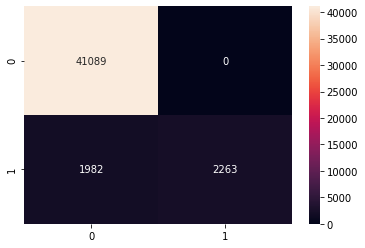

In [117]:
conf_mtrx_tree = confusion_matrix(y_test, y_pred_tree)

sns.heatmap(conf_mtrx_tree, annot=True, fmt='d')

Sur la matrice de confusion ci-dessus, on remarque que :
- Il y a **41 089 vrais négatifs**, c'est-à-dire des achats non frauduleux qui ont été classés correctement
- Il y a **1982 faux négatifs**, c'est-à-dire des achats frauduleux qui n'ont pas été détectés par notre modèle
- Il y a **2263 vrais positifs**, c'est-à-dire des achats frauduleux qui ont été correctement identifiés par notre algorithme
- Il n'y a **aucun faux positifs**, c'est-à-dire des cas non frauduleux qui auraient été identifiés comme étant frauduleux par notre modèle

On souhaite à tout prix éviter les achats frauduleux. Pour cela, on doit donc **limiter au maximum les faux négatifs**. 

Voici quelques axes d'amélioration pour améliorer notre modèle de prédiction :
- Un **système de black-list** permettant de bannir les utilisateurs ayant réalisé des achats frauduleux. En effet, en parcourant les données du dataset, on se rend compte que **certains fraudeurs réalisent plusieurs achats à partir du même *devide_id* et de la même *ip_address***
- **Ajouter de nouvelles variables explicatives** à notre dataset afin de permettre à notre modèle de reconnaitre les cas de fraude restants